# Allen's Algebra of Proper Time Intervals

<i>"<b>Allen's interval algebra</b> is a calculus for temporal reasoning that was introduced by James F. Allen in 1983. The calculus defines possible relations between time intervals and provides a composition table that can be used as a basis for reasoning about temporal descriptions of events."</i> -- [Wikipedia](https://en.wikipedia.org/wiki/Allen%27s_interval_algebra)

Allen's algebra is based on the 13 possible ways that proper time intervals can be related to each other, as shown in the following [figure from Wikipedia](https://en.wikipedia.org/wiki/Allen%27s_interval_algebra#Relations)

<b>NOTE</b>: Several of the relation symbols in <i>qualreas</i> differ from those in the Wikipedia figure, below: B instead of <, A instead of >, and E instead of =

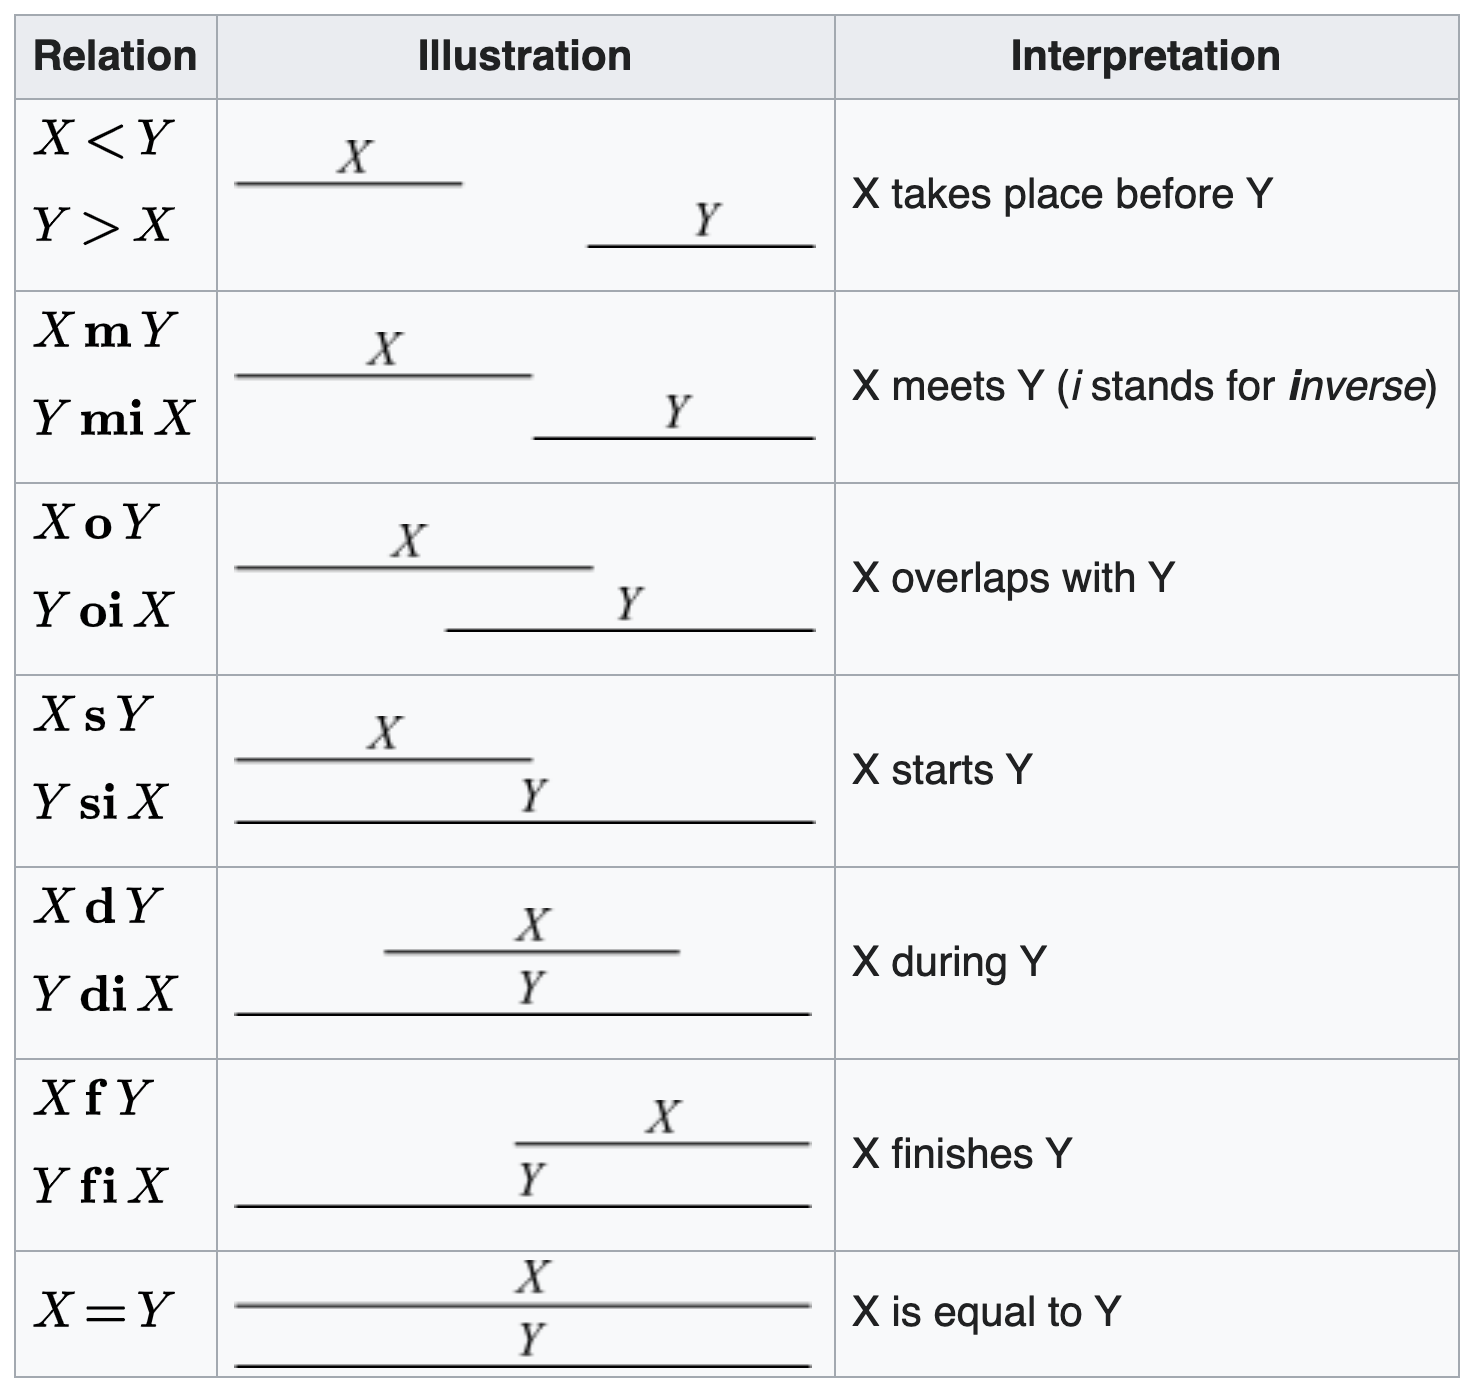

In [1]:
from IPython.display import Image

Image(filename='../docs/_static/Allens_Interval_Relations.png', width="400") 

## References

1. ["Maintaining Knowledge about Temporal Intervals" by James F. Allen](https://cse.unl.edu/~choueiry/Documents/Allen-CACM1983.pdf) - Allen's original paper (PDF)
1. [Allen's Interval Algebra](https://www.ics.uci.edu/~alspaugh/cls/shr/allen.html) or [here](https://thomasalspaugh.org/pub/fnd/allen.html) - summarizes Allen's algebra of proper time intervals
1. ["Intervals, Points, and Branching Time" by A.J. Reich](https://www.researchgate.net/publication/220810644_Intervals_Points_and_Branching_Time) - basis for the extensions to Allen's algebra

## Dependencies

In [2]:
import qualreas as qr
import os

In [3]:
path = os.path.join(os.getenv('PYPROJ'), 'qualreas')

## Instantiate an Algebra

Algebras are defined in JSON format.  The definition of Allen's algebra of proper time intervals, published in 1983, is a "Linear Interval Algebra" and is instantiated as follows:

In [4]:
alg = qr.Algebra(os.path.join(path, "Algebras/Linear_Interval_Algebra.json"))

## Algebra Summary

Two important aspects of an algebra are defined in the JSON file that was loaded above:
1. The algebra's set of relations and their properties
1. The algebra's composition or transitivity table (called TransTable in the JSON file)

The first of these aspects, the set of relations, is described by the Algebra's <i><b>summary</b></i> method, as shown below.

Composition/Transitivity tables are used to implement the Algebra's <i><b>compose</b></i> method, and are generally too large to print out.  (Note: Composition is often referred to as "multiplication".)

In [5]:
alg.summary()

  Algebra Name: Linear_Interval_Algebra
   Description: Allen's algebra of proper time intervals
 Equality Rels: E
     Relations:
            NAME (SYMBOL)         CONVERSE (ABBREV)  REFLEXIVE  SYMMETRIC TRANSITIVE   DOMAIN        RANGE
             Before (  B)               After ( BI)    False      False       True       PInt          PInt
              After ( BI)              Before (  B)    False      False       True       PInt          PInt
             During (  D)            Contains ( DI)    False      False       True       PInt          PInt
           Contains ( DI)              During (  D)    False      False       True       PInt          PInt
             Equals (  E)              Equals (  E)     True       True       True       PInt          PInt
           Finishes (  F)         Finished-by ( FI)    False      False       True       PInt          PInt
        Finished-by ( FI)            Finishes (  F)    False      False       True       PInt          PInt
      

## Algebra Element Summary

Here are a few random individual element summaries:

In [6]:
from random import sample

sample_size = 3

for element in sample(list(alg.elements), sample_size):
    print(50*"-")
    alg.element_summary(element)
print(50*"-")

--------------------------------------------------
                  Symbol: FI
                    Name: Finished-by
                  Domain: ['ProperInterval']
                   Range: ['ProperInterval']
                Converse: Finishes
           Is Reflexive?: False
           Is Symmetric?: False
          Is Transitive?: True
Is an Equality Relation?: False
--------------------------------------------------
                  Symbol: B
                    Name: Before
                  Domain: ['ProperInterval']
                   Range: ['ProperInterval']
                Converse: After
           Is Reflexive?: False
           Is Symmetric?: False
          Is Transitive?: True
Is an Equality Relation?: False
--------------------------------------------------
                  Symbol: SI
                    Name: Started-By
                  Domain: ['ProperInterval']
                   Range: ['ProperInterval']
                Converse: Starts
           Is Reflexive?: Fal

## Equality Relations

The number and type of equality relations in an algebra depends on the number and type of entities (e.g., 'Point', 'ProperInterval') related by relations in the algebra.

In [7]:
print(f"\n{alg.description}")
print(f"has the following Equality Relation(s): {alg.all_equality_relations}")


Allen's algebra of proper time intervals
has the following Equality Relation(s): E


Allen's algebra has only one equality relation because the domains and ranges of the relations are only of one type, ProperInterval.

Here is the element summary of Allen's equality relation:

In [8]:
for eq_rel in alg.all_equality_relations:
    print(50*"-")
    alg.element_summary(eq_rel)
print(50*"-")

--------------------------------------------------
                  Symbol: E
                    Name: Equals
                  Domain: ['ProperInterval']
                   Range: ['ProperInterval']
                Converse: Equals
           Is Reflexive?: True
           Is Symmetric?: True
          Is Transitive?: True
Is an Equality Relation?: True
--------------------------------------------------


## Creating Relation Sets

A set of relations ("relset") represents a disjunction.

For example, if $r_1, r_2, r_3$ are relations, and $A$ & $B$ are proper time intervals, then:

$A\{r_1,r_2,r_3\}B \Leftrightarrow (A r_1 B) \vee (A r_2 B) \vee (A r_3 B)$

There are two acceptable input formats for creating relation sets, the first of which, shown below, is also the print representation of a relset:

In [9]:
relset_version1 = alg.relset("B|M|FI")
relset_version2 = alg.relset(['B', 'FI', 'M'])
print(relset_version1)
print(relset_version2)
print(f"Same? {relset_version1 == relset_version2}")

B|FI|M
B|FI|M
Same? True


Singleton sets can also be created in two ways:

In [10]:
singleton_relset_v1 = alg.relset("B")
singleton_relset_v2 = alg.relset(["B"])
print(singleton_relset_v1)
print(singleton_relset_v2)
print(f"Same? {singleton_relset_v1 == singleton_relset_v2}")

B
B
Same? True


And, there are two ways the empty set can be created:

In [11]:
empty_relset_v1 = alg.relset("")
empty_relset_v2 = alg.relset([])
print(empty_relset_v1)  # Nothing will printout here.
print(empty_relset_v2)  # Nor here.
print(f"Same? {empty_relset_v1 == empty_relset_v2}")

empty_relset_v1  # Just so we can see something that looks empty...



Same? True


relset()

## Operations on Relation Sets

### Addition

Addition (+) is set intersection:

In [12]:
alg.relset('B|M|O') + alg.relset('F|O|M|S')

relset(['M', 'O'])

In [13]:
alg.relset('B|M|O') + alg.relset('F|S')

relset()

### Composition

Composition, sometimes referred to as "multiplication", is relation composition applied to sets of relations.  (https://en.wikipedia.org/wiki/Composition_of_relations)

Loosely speaking, let $\rho, \sigma, \tau$ be relation sets, then $\rho ; \sigma = \tau$, if, by transitivity, $(A \rho B) \wedge (B \sigma C) \Rightarrow (A \tau C)$.

The transitivity table in the algebra's JSON definition file describes how singleton relation sets compose with each other.  When more than one relation appears in a set, the result of composition is the union of all pairwise compositions of the individual relations in the sets.

For example, below, we calculate (F|MI);(O|D) and then break it down into 4 different compositions involving single relations, representing the pairwise compositions of F|MI and O|D:

In [14]:
rel1 = "F"
rel2 = "O"
rel3 = "MI"
rel4 = "D"

print(f"({rel1}|{rel3});({rel2}|{rel4}) = {alg.compose(alg.relset('F|MI'), alg.relset('O|D'))}")

(F|MI);(O|D) = D|F|O|OI|S


In [15]:
print(f"{rel1};{rel2} = {alg.compose(alg.relset(rel1), alg.relset(rel2))}")
print(f"{rel1};{rel4} = {alg.compose(alg.relset(rel1), alg.relset(rel4))}")
print(f"{rel3};{rel2} = {alg.compose(alg.relset(rel3), alg.relset(rel2))}")
print(f"{rel3};{rel4} = {alg.compose(alg.relset(rel3), alg.relset(rel4))}")

F;O = D|O|S
F;D = D
MI;O = D|F|OI
MI;D = D|F|OI


### Converses

<u><b>NOTATION</b></u>:  Here, we'll denote the converse operation with "!".  

So, if $A$ and $B$ are Temporal Entities, and $r$ is a relation between them, then $!r$ is its converse relation.

Thus, $A r B \Leftrightarrow B !r A$.  For example, "A before B" if and only if "B after A".

Individual relations have converses:

In [16]:
rel_symbol = 'B'
print(f"The converse of {alg.rel_name(rel_symbol)} is {alg.rel_converse_name(rel_symbol)}")

The converse of Before is After


And relation sets also have converses:

In [17]:
print(f"!{alg.relset(rel_symbol)} = {alg.converse(alg.relset(rel_symbol))}")
print(f"!({alg.converse(relset_version1)}) = {relset_version1}")

!B = BI
!(BI|F|MI) = B|FI|M


### Complement of a Relation Set

The complement of a relation set, R, is the set of all relation elements that are not in R.

We'll use ~R to denote the complement of R.

In [18]:
R = alg.relset('B|BI|D|DI|E|F|FI')
compR = R.complement()

print(f"\nAll Elements = {alg.elements}")
print(f"          R  = {R}")
print(f"         ~R  =                  {compR}")
print(f"       ~(~R) = {compR.complement()}")


All Elements = B|BI|D|DI|E|F|FI|M|MI|O|OI|S|SI
          R  = B|BI|D|DI|E|F|FI
         ~R  =                  M|MI|O|OI|S|SI
       ~(~R) = B|BI|D|DI|E|F|FI


## Global Properties of an Algebra of Relations

There are two properties of an Algebra that are true for all "applicable" elements in the algebra:
* The Composition Identity
* Associativity, when domains & ranges permit

### Composition Identity

If $r$ and $s$ are two relations, then $!(r;s) = (!s);(!r)$

Here's an example:

In [19]:
r = alg.relset("O")
s = alg.relset("F")

conv_comp_r_s = alg.converse(alg.compose(r, s))
print(f"!({r};{s}) = {conv_comp_r_s}")

comp_conv_s_conv_r = alg.compose(alg.converse(s), alg.converse(r))
print(f"!{s};!{r} = {comp_conv_s_conv_r}")

print(f"Same? {conv_comp_r_s == comp_conv_s_conv_r}")

!(O;F) = DI|OI|SI
!F;!O = DI|OI|SI
Same? True


The <i><b>check_composition_identity</b></i> Algebra method checks every possible pairing of individual algebra relations wrt the composition identity, and returns True if all pairs check out.

In [20]:
alg.check_composition_identity(verbose=True)


Linear_Interval_Algebra -- Composition Identity Check:
PASSED . 169 products tested.


True

### Associativity

The <i><b>is_associative</b></i> Algebra method checks all possible triples of individual algebra relations and, if the domains and ranges are "compatible", checks to see if the triple is associative.  Incompatible triples are skipped.  It returns True if all compatible triples are associative.  Since the relations in Allen's algebra only relate one type of entity, "ProperInterval", there are no relation pairings that are incompatible with respect to composition.

In [21]:
num_elements = len(alg.elements)
print(f"There are {num_elements}^3 = {num_elements**3} ways we can combine the algebra's elements to test associativity.")

There are 13^3 = 2197 ways we can combine the algebra's elements to test associativity.


The following method tests all of those ways, skipping the ones that don't make sense due to range-domain mismatches.

In [22]:
alg.is_associative()

TEST SUMMARY: 2197 OK, 0 Skipped, 0 Failed (2197 Total)


True

The following comment from the source code describes how domains and ranges make some compositions of relations impossible to compute ("incompatible"). This occurs, for example, in the extensions to Allen's algebra found in the paper by [Reich, 1994](https://www.researchgate.net/publication/220810644_Intervals_Points_and_Branching_Time), where <i>ProperIntervals</i> and <i>Points</i> are integrated.

In [23]:
# All relations have a domain and a range.  If D1, R1, D2, and R2 are the domains and ranges
# of relations r1 & r2, resp., then the composition of r1 and r2 (written r1;r2 in algebraic
# logic literature) requires that the intersection of R1 and D2 be non-empty.  To see why,
# consider what the composition means wrt the associated Temporal Entities, teA, teB, and
# teC, where (teA r1 teB) and (teB r2 teC).  The ontological classes that teB belongs to
# must include the range of r1 (R1) and the domain of r2 (D2) for r1;r2 to make sense.
#
#                r1         r2
#          teA -----> teB -----> teC
#           D1       R1,D2        R2
#            |                    ^
#            |                    |
#            +--------------------+
#                     r1;r2
#
# Matrix multiplication, M x N, provides an analogy: the number of columns of M must
# match the number of rows of N.